In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [7]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train/255
x_test = x_train/255

In [9]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [11]:
x_test_flattened.shape

(10000, 784)

In [12]:
x_train_flattened.shape


(60000, 784)

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape =(784,),activation='sigmoid')
])

model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x_train_flattened ,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6654 - accuracy: 0.8416
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1831 - accuracy: 0.8786
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7647 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5223 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4629 - accuracy: 0.8869


In [26]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.2503 - accuracy: 0.8788


[6.250275611877441, 0.8787999749183655]

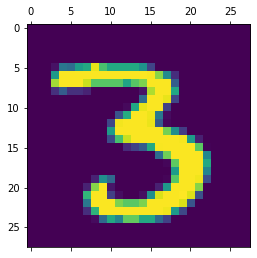

In [44]:
plt.matshow(x_test[12])

In [47]:
y_predicted = model.predict(x_test_flattened)
y_predicted[12]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9124148e-08,
       1.0000000e+00, 1.4143783e-17, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [49]:
np.argmax(y_predicted[12])

4

In [53]:
y_prediction_labels = [np.argmax(i) for i in y_predicted]
y_prediction_labels[:10]

[3, 0, 1, 0, 4, 1, 4, 1, 4, 4]

In [52]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [80]:
model = keras.Sequential([
    keras.layers.Dense(500,input_shape =(784,),activation='relu'),
     keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x_train_flattened ,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 1.1914 - accuracy: 0.8535
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2802 - accuracy: 0.9251
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1933 - accuracy: 0.9474
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1521 - accuracy: 0.9592
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1365 - accuracy: 0.9635


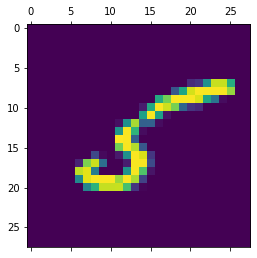

In [92]:
plt.matshow(x_test[11])

In [102]:
y_predicted = model.predict(x_test_flattened)
y_predicted[13]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [103]:
np.argmax(y_predicted[13])

0

In [104]:
y_prediction_labels = [np.argmax(i) for i in y_predicted]
y_prediction_labels[:12]

[0, 0, 1, 0, 4, 1, 4, 0, 8, 0, 0, 6]

In [94]:
y_test[:12]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6], dtype=uint8)

In [107]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    1,    0,    0,    0,    0,    4,    0],
       [   0, 1125,    1,    2,    0,    2,    1,    1,    3,    0],
       [ 940,   20,   58,    1,    1,    0,    1,    3,    6,    2],
       [   3,    0,   16,  964,    0,    4,    0,    4,   14,    5],
       [  12,   74,  223,    0,  661,    0,    4,    2,    0,    6],
       [ 260,    1,   28,  352,    4,  209,    3,    0,   33,    2],
       [  78,   24,    3,    1,  174,   54,  615,    0,    9,    0],
       [ 596,  354,   36,    8,    6,    0,    0,   23,    2,    3],
       [   4,    1,    6,    3,    8,    2,    2,    5,  936,    7],
       [ 873,    2,   67,   20,   17,    2,    0,    6,    1,   21]])>

Text(69.0, 0.5, 'Truth')

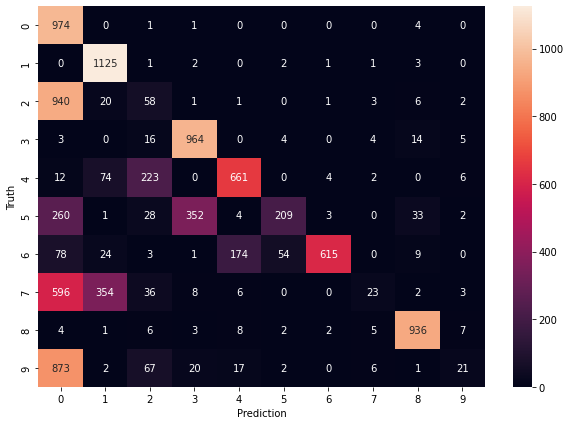

In [110]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')